In [139]:
# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib
%matplotlib inline

# display
from IPython.display import display

# autoreload
%load_ext autoreload
%autoreload 2

# warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed
from numpy.random import seed as set_random_seed
set_random_seed(42)

# explainability
# import shap, lime, eli5
# shap.initjs()

import datetime
import emoji

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
with open('data/whatsapp_chat.txt','r', encoding = 'utf-8') as f:
    lines = f.readlines()

In [85]:
def parse_time(line_substr):
    dt = datetime.datetime.strptime(line_substr, '%d.%m.%Y, %H:%M')
    return dt
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    with open(file,'r', encoding = 'utf-8') as f:
        lines = f.readlines()
    added_lines = []
    for line in lines:
        try:
            parse_time(line.split(' - ')[0])
            added_lines.append(line)
        except:
            added_lines[-1] += line
    return pd.Series(added_lines)

lines = read_file('data/whatsapp_chat.txt')

In [93]:
line = lines[4]
def parse_line(line,dt_char = ' - ', name_char = ': '):
    dt_split = line.split(dt_char)
    dt = parse_time(dt_split[0])
    line = dt_char.join(dt_split[1:])

    name_split = line.split(name_char)
    name = name_split[0]
    text = name_char.join(name_split[1:])
    # removes last \n
    text = text[:-1]
    return pd.Series({
        'datetime': dt,
        'name': name,
        'text': text
    })

chat = lines.apply(parse_line)

In [158]:
import re
MEDIA_TOKEN = '<M>'
URL_TOKEN = '<url>'
def preprocess_text(text):
    if text == '<המדיה לא נכללה>':
        return MEDIA_TOKEN
    text = re.sub('https?://\S+|www\.\S+', URL_TOKEN, text)
    return text

In [159]:
chat['text'] = chat['text'].apply(preprocess_text)

In [108]:
!pip install wordcloud

In [144]:
def reverse_text(text):
    return text[::-1]
def extract_emojis(text):
    return ' '.join(c for c in text if c in emoji.UNICODE_EMOJI['en'])

0                            איזה אתרים קדושים יש בירושלים
1        לפי מקומות - תל-אביב - 'משימה שקשורה לים'\nירו...
2        לדוגמא :backhand_index_pointing_up_medium-ligh...
3                                        זה מה שאני אמרתי!
4                                  תעשה בירושלים את הפלאפל
                               ...                        
39994                       זה * בול * מה שרציתי שיהיה לנו
39995                                                  <M>
39996                                          איזה כיף (:
39997                         תאמרי לה לשים אותם גבוה גבוה
39998                                                  <M>
Name: text, Length: 39999, dtype: object

In [180]:
hebrew_stopwords = [
    'אני',
    'את',
    'אתה',
    'אנחנו',
    'אתן',
    'אתם',
    'הם',
    'הן',
    'היא',
    'הוא',
    'שלי',
    'שלו',
    'שלך',
    'שלה',
    'שלנו',
    'שלכם',
    'שלכן',
    'שלהם',
    'שלהן',
    'לי',
    'לו',
    'לה',
    'לנו',
    'לכם',
    'לכן',
    'להם',
    'להן',
    'אותה',
    'אותו',
    'זה',
    'זאת',
    'אלה',
    'אלו',
    'תחת',
    'מתחת',
    'מעל',
    'בין',
    'עם',
    'עד',
    'נגר',
    'על',
    'אל',
    'מול',
    'של',
    'אצל',
    'כמו',
    'אחר',
    'אותו',
    'בלי',
    'לפני',
    'אחרי',
    'מאחורי',
    'עלי',
    'עליו',
    'עליה',
    'עליך',
    'עלינו',
    'עליכם',
    'לעיכן',
    'עליהם',
    'עליהן',
    'כל',
    'כולם',
    'כולן',
    'כך',
    'ככה',
    'כזה',
    'זה',
    'זות',
    'אותי',
    'אותה',
    'אותם',
    'אותך',
    'אותו',
    'אותן',
    'אותנו',
    'ואת',
    'את',
    'אתכם',
    'אתכן',
    'איתי',
    'איתו',
    'איתך',
    'איתה',
    'איתם',
    'איתן',
    'איתנו',
    'איתכם',
    'איתכן',
    'יהיה',
    'תהיה',
    'היתי',
    'היתה',
    'היה',
    'להיות',
    'עצמי',
    'עצמו',
    'עצמה',
    'עצמם',
    'עצמן',
    'עצמנו',
    'עצמהם',
    'עצמהן',
    'מי',
    'מה',
    'איפה',
    'היכן',
    'במקום שבו',
    'אם',
    'לאן',
    'למקום שבו',
    'מקום בו',
    'איזה',
    'מהיכן',
    'איך',
    'כיצד',
    'באיזו מידה',
    'מתי',
    'בשעה ש',
    'כאשר',
    'כש',
    'למרות',
    'לפני',
    'אחרי',
    'מאיזו סיבה',
    'הסיבה שבגללה',
    'למה',
    'מדוע',
    'לאיזו תכלית',
    'כי',
    'יש',
    'אין',
    'אך',
    'מנין',
    'מאין',
    'מאיפה',
    'יכל',
    'יכלה',
    'יכלו',
    'יכול',
    'יכולה',
    'יכולים',
    'יכולות',
    'יוכלו',
    'יוכל',
    'מסוגל',
    'לא',
    'רק',
    'אולי',
    'אין',
    'לאו',
    'אי',
    'כלל',
    'נגד',
    'אם',
    'עם',
    'אל',
    'אלה',
    'אלו',
    'אף',
    'על',
    'מעל',
    'מתחת',
    'מצד',
    'בשביל',
    'לבין',
    'באמצע',
    'בתוך',
    'דרך',
    'מבעד',
    'באמצעות',
    'למעלה',
    'למטה',
    'מחוץ',
    'מן',
    'לעבר',
    'מכאן',
    'כאן',
    'הנה',
    'הרי',
    'פה',
    'שם',
    'אך',
    'ברם',
    'שוב',
    'אבל',
    'מבלי',
    'בלי',
    'מלבד',
    'רק',
    'בגלל',
    'מכיוון',
    'עד',
    'אשר',
    'ואילו',
    'למרות',
    'אס',
    'כמו',
    'כפי',
    'אז',
    'אחרי',
    'כן',
    'לכן',
    'לפיכך',
    'מאד',
    'עז',
    'מעט',
    'מעטים',
    'במידה',
    'שוב',
    'יותר',
    'מדי',
    'גם',
    'כן',
    'נו',
    'אחר',
    'אחרת',
    'אחרים',
    'אחרות',
    'אשר',
    'או'
]


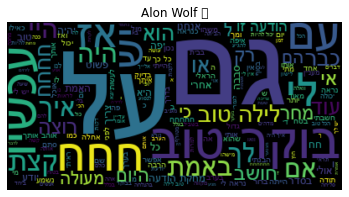

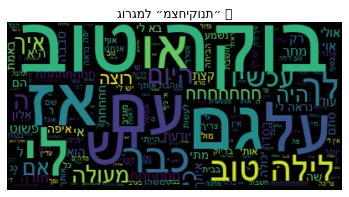

In [174]:
from wordcloud import WordCloud
def generate_wordcloud_for_name(name):
    text_series = chat[chat['name'] == name]['text']
    
    def preprocess_text_for_wordcloud(text):
        text = re.sub(MEDIA_TOKEN, '', text)
        text = re.sub(URL_TOKEN, '', text)
        for word in hebrew_stopwords:
            text = re.sub(word, '', text)
        text = re.sub(' [אבגדהוזחטיכךלמםנןסעפףצץקרשת] ', ' ', text)
        text = reverse_text(text)
#         text = emoji.demojize(text)
        text = ''.join([c for c in text if c not in emoji.UNICODE_EMOJI])
        return text
    text = ' '.join(text_series.apply(preprocess_text_for_wordcloud))
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(font_path='data/arial.ttf').generate(text)

    # Display the generated image:
    plt.title(name)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
for name in chat['name'].unique():
    generate_wordcloud_for_name(name)

In [148]:
chat['text'].apply(emoji.demojize)

'   😂     😂 👍 🏼          ❤                     😍       ❤ ☺  ❤  ☺         ☺         😂    ☺                 ☺ 😔   ☺           😊       😂 😂 😂                     ☺     ☺            ☺       ❤     ❤       😪        😅  ❤ ❤ ❤ ❤                        ☺      ☺   👍            ❤       ☺  ❤    😂     ☺       ❤        ❤  ❤ ☺      ☺ 🧀        ❤           😪   ☺    ❤   ☺ 😱   👍 🏼         ❤  ❤                                    ☺     ☺  ☺            ☺           ❤ 😂 😂 😂      ☺     ❤                        😂 😂 😂                         ☺ 😳 ☺             ❤ 😂   😍 😍 😍     🏃 🏻 ♀            😱           ☺ ☺ ❤          ❤  ❤ ❤ ❤   ☺                      😂 😩                  ❤ ❤            👍 🏼 👍 🏼 👍 🏼  ☺ 👏 🏼  ☺                       ☺     😁 ☺   ❤ ❤ ❤         👍 🏼 ❤  🤔  ❤  😱                                 ☺                    👍 🏼         😩  😉 😉 😉          👍 🏼         😂                 👍 🏼          ☺    ❤      ❤  ☺ 😱          👍 🏼       😩     😱         ❤ ❤ ❤     ❤ ❤ ❤            ☺                                 😳     ❤

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botswana:',
  '🇧🇻': ':Bouvet_Island:',
  '🇧🇷': ':Brazil:',
  '🇮🇴': ':Britis

In [153]:
chat

,datetime,name,text
0,2018-05-10 13:45:00,Alon Wolf 🐺,איזה אתרים קדושים יש בירושלים
1,2018-05-10 13:45:00,Alon Wolf 🐺,לפי מקומות - תל-אביב - 'משימה שקשורה לים'\nירו...
2,2018-05-10 13:46:00,Alon Wolf 🐺,לדוגמא 👆🏼
3,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,זה מה שאני אמרתי!
4,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,תעשה בירושלים את הפלאפל
...,...,...,...
39994,2020-11-20 07:46:00,Alon Wolf 🐺,זה * בול * מה שרציתי שיהיה לנו
39995,2020-11-20 07:46:00,Alon Wolf 🐺,<M>
39996,2020-11-20 07:47:00,Alon Wolf 🐺,איזה כיף (:
39997,2020-11-20 07:47:00,Alon Wolf 🐺,תאמרי לה לשים אותם גבוה גבוה


In [161]:
chat['text'][chat['text'].str.contains('M')].apply(print)

<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
My sweet potato
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
לאוס:
Wattay International Airport‏
description‏
network name: COFFEE SHOP - password: COFFEELOVE19
האנוי:
name‏
Noi Bai International Airport‏
description‏
Free wifi; network name: NoiBai AirPort FreeWifi -- Gate 35 network name: Hong Ngoc - password: 12345678
פו קוק: 
name‏
Phu Quoc international airport‏
description‏
Gates 1, 2, and 3 network name: Starcafe Mobile Cart PQC - password: starc

<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
<M>
הודעה לציבור - סיכום חקירה אפידמילוגית של חולה מארה"ב-ניו יורק, אשר שהתה בישראל. 
‏
אישה מניו יורק (*ונמצאת עכשיו שם* ) שאובחנה אמש בארה"ב כחיובית לנגיף הקורונה ביקרה בישראל בתאריכים 23-27 לפברואר 2020 ושהתה בירושלים. 

האישה (בשנות החמישים לחייה, ללא תסמינים של מחלה) היא מגע קרוב של חולה קורונה מוכח המאושפז בבית חולים בניו יורק. 

החולה הגיעה לארץ בטיסת אל 

5        None
20       None
21       None
50       None
54       None
         ... 
39974    None
39981    None
39987    None
39995    None
39998    None
Name: text, Length: 4662, dtype: object